In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import missingno
from os.path import join

In [28]:
tickers = pd.read_csv(join("data", "constituents_csv.csv")).Symbol.to_list()
snp_price_history = yf.download(tickers, start="2005-01-01", progress=True, period="1d", group_by="column", prepost=False, keepna=True, threads=8, actions=True, timeout=1000, show_errors=True)
snp_price_history

[*********************100%%**********************]  505 of 505 completed


25 Failed downloads:
['BLL', 'KSU', 'FBHS', 'TWTR', 'PKI', 'DRE', 'RE', 'NLOK', 'DISCK', 'CTXS', 'CERN', 'PBCT', 'SIVB', 'INFO', 'FISV', 'BRK.B', 'FRC', 'DISCA', 'WLTW', 'VIAC', 'NLSN', 'ANTM', 'FB', 'XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')
['BF.B']: Exception("%ticker%: Period '1d' is invalid, must be one of ['1mo', '3mo', '6mo', 'ytd', '1y', '2y', '5y', '10y', 'max']")


Adj Close                                                        \
                     A    AAL        AAP        AAPL        ABBV         ABC   
Date                                                                           
2005-01-03   14.512987    NaN  25.508373    0.959292         NaN   11.167792   
2005-01-04   14.130105    NaN  25.338509    0.969144         NaN   11.079442   
2005-01-05   14.124026    NaN  25.385374    0.977632         NaN   11.112099   
2005-01-06   13.814078    NaN  25.361944    0.978390         NaN   11.152428   
2005-01-07   13.801916    NaN  25.215506    1.049628         NaN   11.173557   
...                ...    ...        ...         ...         ...         ...   
2023-10-13  110.510002  11.72  50.750000  178.850006  147.960007  188.979996   
2023-10-16  111.500000  11.94  53.590000  178.720001  147.229996  186.860001   
2023-10-17  112.400002  11.94  54.680000  177.149994  149.179993  187.449997   
2023-10-18  108.610001  11.36  53.240002  175.839996  149.279999  189.550003   
2023-10-19  109.510002  11.45  51.299999  175.460007  145.520004  189.889999   

                                                      ...   Volume       \
             ABMD        ABT         ACN        ADBE  ...      XEL XLNX   
Date                                                  ...                 
2005-01-03  15.01  14.365739   18.995516   30.838949  ...   879200  NaN   
2005-01-04  14.98  14.221063   18.548899   30.024111  ...  1220300  NaN   
2005-01-05  14.69  14.057919   18.476868   29.859142  ...  1430000  NaN   
2005-01-06  14.52  14.374974   18.311186   29.364239  ...  1019200  NaN   
2005-01-07  14.29  14.621228   19.168398   29.384233  ...  1267600  NaN   
...           ...        ...         ...         ...  ...      ...  ...   
2023-10-13    NaN  90.870003  301.829987  548.760010  ...  3732700  NaN   
2023-10-16    NaN  92.180000  305.339996  550.739990  ...  3184700  NaN   
2023-10-17    NaN  92.139999  308.250000  560.090027  ...  3778800  NaN   
2023-10-18    NaN  95.559998  303.769989  557.869995  ...  3830700  NaN   
2023-10-19    NaN  95.440002  302.940002  555.739990  ...  4442300  NaN   

                                                                              \
                 XOM     XRAY        XYL      YUM      ZBH     ZBRA     ZION   
Date                                                                           
2005-01-03  16009200  1022000        NaN  3257166  1478256   443500   347900   
2005-01-04  16718000   616000        NaN  3228789  1271638   696500   388200   
2005-01-05  12189100   675600        NaN  2126839  1218799  1054400   602100   
2005-01-06  13098700   475600        NaN  1802458  1193667   280000   321100   
2005-01-07  11315300   487800        NaN  2023349  1176466   351600   806100   
...              ...      ...        ...      ...      ...      ...      ...   
2023-10-13  30276500  1475900   926300.0  1352900  1556600   460900  2202500   
2023-10-16  18452000  1981000  1003200.0        0  1284400   425300  2388500   
2023-10-17  19775400  5088500  1265900.0        0  1455000   355800  4232700   
2023-10-18  23380300  4149400  1213500.0        0  1397500   346400  3606500   
2023-10-19  20968400  2015700  2138200.0  1901116  1412200   517500  8545800   

                       
                  ZTS  
Date                   
2005-01-03        NaN  
2005-01-04        NaN  
2005-01-05        NaN  
2005-01-06        NaN  
2005-01-07        NaN  
...               ...  
2023-10-13  1287400.0  
2023-10-16  1264400.0  
2023-10-17  1716300.0  
2023-10-18  1228600.0  
2023-10-19  1602300.0  

[4732 rows x 3990 columns]

In [97]:
# drop failed tickers

drop_ticker_list = ['BF.B'] + ['BLL', 'KSU', 'FBHS', 'TWTR', 'PKI', 'DRE', 'RE', 'NLOK', 'DISCK', 'CTXS', 'CERN', 'PBCT', 'SIVB', 'INFO', 'FISV', 'BRK.B', 'FRC', 'DISCA', 'WLTW', 'VIAC', 'NLSN', 'ANTM', 'FB', 'XLNX']
snp_price_history = snp_price_history.drop(drop_ticker_list, axis=1, level=1)
snp_price_history.shape

(4732, 3840)

In [98]:
# Export to feather files in long format

data_names = ["Volume", "Open", "Close", "Low", "High", "Dividends"]

for data_name in data_names:
    (pd.melt(
        snp_price_history[data_name].reset_index("Date"), 
        id_vars="Date", var_name="Ticker", 
        value_name=data_name)
        .to_feather(
            join("data", f"yfinance_snp_tickers_{data_name}.feather")
            ))

In [99]:
# 6% is NA

price_df = pd.read_feather(join("data", "yfinance_snp_tickers_Close.feather"))
price_df.Close.isna().sum() / price_df.Close.size

0.06421263031839955

In [100]:
# calculate returns and plot for sanity check

returns_df = price_df.drop("Close", axis=1).copy()
returns_df["price_returns"] = price_df.groupby("Ticker")[["Close"]].pct_change()
returns_df.to_feather(join("data", "yfinance_snp_tickers_price_returns.feather"))
returns_df

,Date,Ticker,price_returns
0,2005-01-03,A,NaN
1,2005-01-04,A,-0.026382
2,2005-01-05,A,-0.000430
3,2005-01-06,A,-0.021945
4,2005-01-07,A,-0.000880
...,...,...,...
2271355,2023-10-13,ZTS,0.000402
2271356,2023-10-16,ZTS,0.004588
2271357,2023-10-17,ZTS,-0.005252
2271358,2023-10-18,ZTS,-0.027086


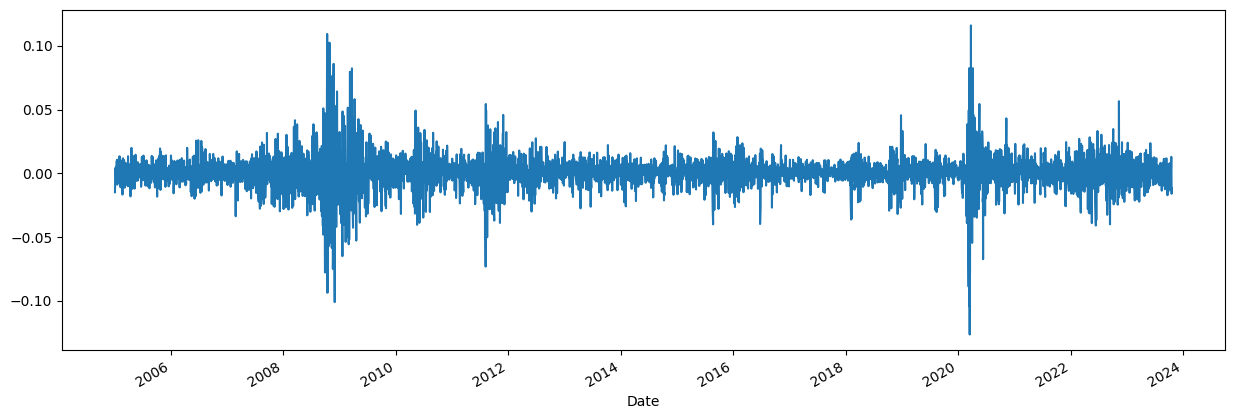

In [101]:
# visualize the mean return of s&p index

returns_df.groupby("Date").price_returns.mean().plot(figsize=(15, 5))
plt.show()